**UNIVERSIDADE DE SÃO PAULO**<br>
**MBA DATA SCIENCE & ANALYTICS USP/ESALQ**<br>
**ÁRVORES, REDES E ENSEMBLE MODELS**<br>
**Prof. João Fernando Serrajordia Rocha de Melo**<br>
Aluna: Luiza Batista Laquini<br>
Turma: DSA 241<br>

*coding: utf-8*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

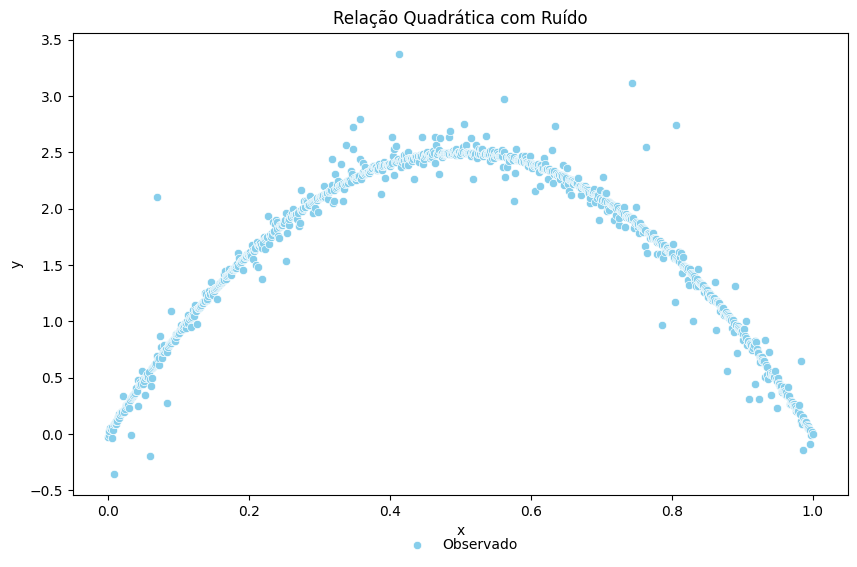

In [5]:
# Semente aleatória para reprodutibilidade (sacou o eastereg?)
np.random.seed(2360873)

# Gerar 1000 valores sequenciais para X
x = np.linspace(0, 1, 1000)

# Definindo os parâmetros da parábola
a = 0
b = 10
c = -10

# Gerar uma relação quadrática com ruído
y = a + b * x + c * x**2 + np.random.normal(loc=0, scale=.3, size=len(x))**3

# Criar o data frame
df = pd.DataFrame({'x': x, 'y': y})

# Construir o gráfico
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.scatterplot(x='x', y='y', data=df, color='skyblue', label='Observado')

# Estética do gráfico
plt.title('Relação Quadrática com Ruído')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3, frameon=False)  # Adjust legend position
plt.show()

In [3]:
df.head()

,x,y
0,0.000000,-0.023879
1,0.001001,-0.004690
2,0.002002,0.030266
3,0.003003,0.051358
4,0.004004,0.048365


In [6]:
# Treinar a árvore de regressão com profundidade = 2
tree = DecisionTreeRegressor(max_depth=2, ccp_alpha=0) 
tree.fit(df[['x']], df['y'])

DecisionTreeRegressor(ccp_alpha=0, max_depth=2)

In [7]:
# Valores preditos
df['p'] = tree.predict(df[['x']])
print(df[['p']].tail()) #investigar a previsão
df['r'] = df['y'] - df['p']

            p
995  0.350275
996  0.350275
997  0.350275
998  0.350275
999  0.350275


In [8]:
df.head()

,x,y,p,r
0,0.000000,-0.023879,0.770969,-0.794847
1,0.001001,-0.004690,0.770969,-0.775659
2,0.002002,0.030266,0.770969,-0.740702
3,0.003003,0.051358,0.770969,-0.719611
4,0.004004,0.048365,0.770969,-0.722604


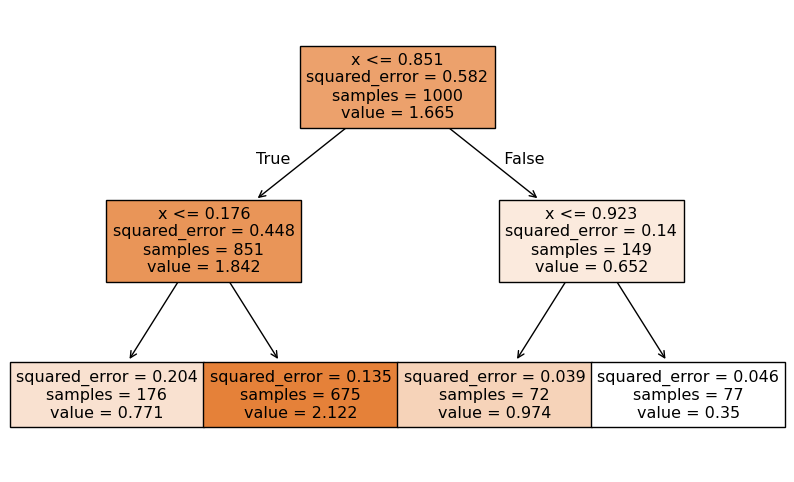

In [9]:
# Plotando a árvore
plt.figure(figsize=(10, 6))
plot_tree(tree, filled=True, feature_names=['x'])
plt.show()

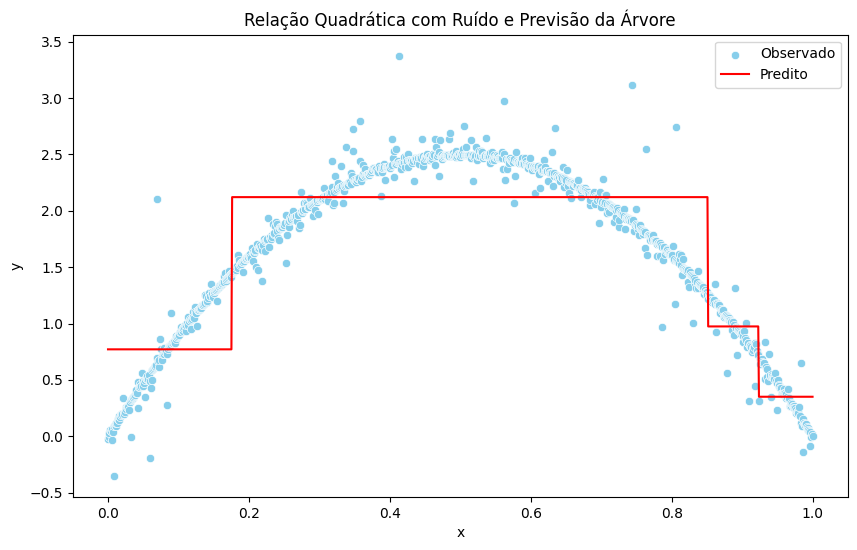

In [10]:
#%% Gráfico de dispersão com a previsão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', data=df, color='skyblue', label='Observado')
plt.plot(df['x'], df['p'], color='red', label='Predito') #adicionando a linha de previsão
plt.title('Relação Quadrática com Ruído e Previsão da Árvore')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

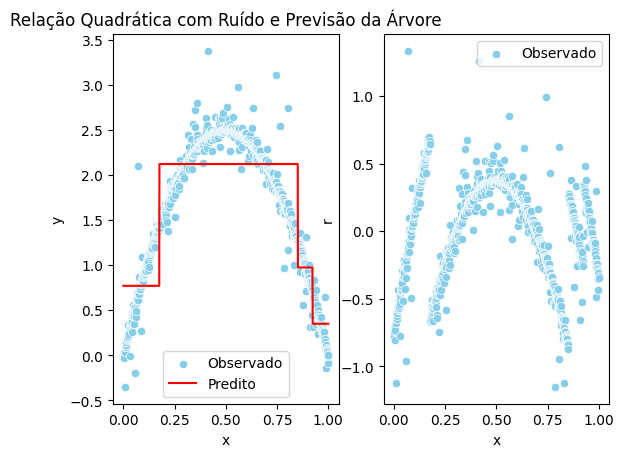

In [11]:
#%% Gráfico de resíduos

fig, ax = plt.subplots(1, 2)

sns.scatterplot(x='x', y='y', data=df, color='skyblue', label='Observado', ax=ax[0])

ax[0].plot(df['x'], df['p'], color='red', label='Predito') #adicionando a linha de previsão
ax[0].set_title('Relação Quadrática com Ruído e Previsão da Árvore')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].legend()
# ax[0].show()

sns.scatterplot(x='x', y='r', data=df, color='skyblue', label='Observado', ax=ax[1])
plt.show()

In [12]:
#%% Empacotar a árvore e o gráfico em uma chamada de função

def passo_arvore(profundidade=3):
    # árvore
    tree = DecisionTreeRegressor(max_depth=profundidade, ccp_alpha=0) 
    tree.fit(df[['x']], df['y'])
    
    df['p'] = tree.predict(df[['x']])
    df['r'] = df['y'] - df['p']
    
    # Define a figura com dois sistemas de eixos
    fig, ax = plt.subplots(1, 2, figsize=(12, 6)) # Increased figure size for better spacing
    
    # Gráfico principal - obs vs esp
    sns.scatterplot(x='x', y='y', data=df, color='skyblue', label='Observado', ax=ax[0])
    ax[0].plot(df['x'], df['p'], color='red', label='Predito') #adicionando a linha de previsão
    ax[0].set_title(f'Observados vs Esperados - profundidade = {i}')
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].legend()
    
    # Gráfico da direita - resíduos
    sns.scatterplot(x='x', y='r', data=df, color='skyblue', label='Resíduos', ax=ax[1]) # Corrected label
    ax[1].set_title(f'Resíduos com profundidade = {i}')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('Resíduos')
    ax[1].legend()
    plt.tight_layout() # Adjusts subplot params for a tight layout
    plt.show()

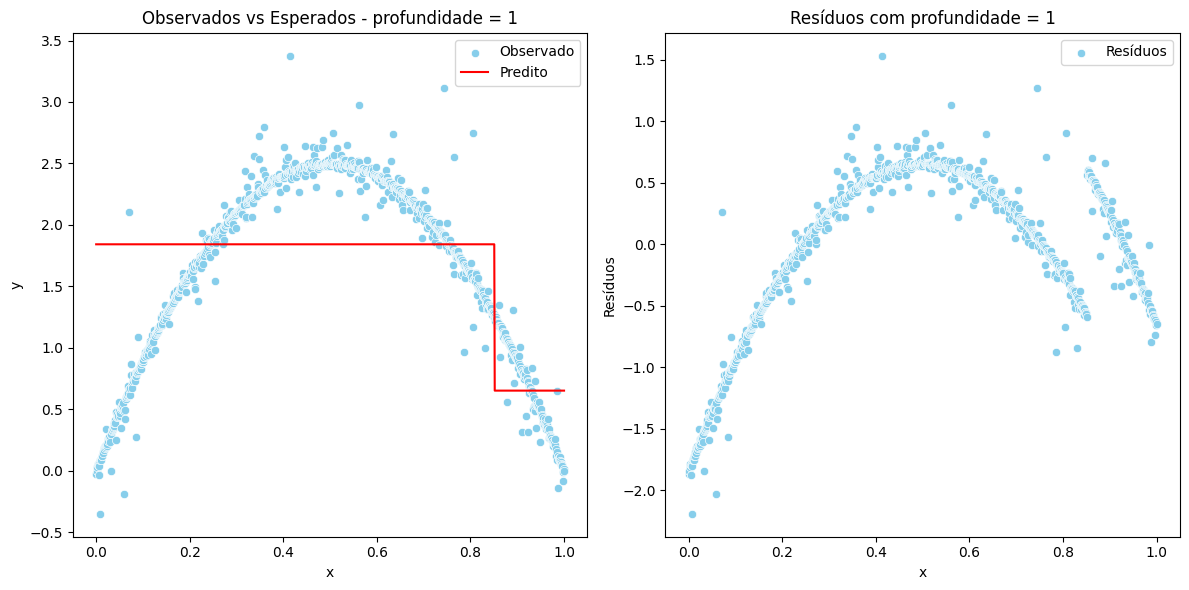

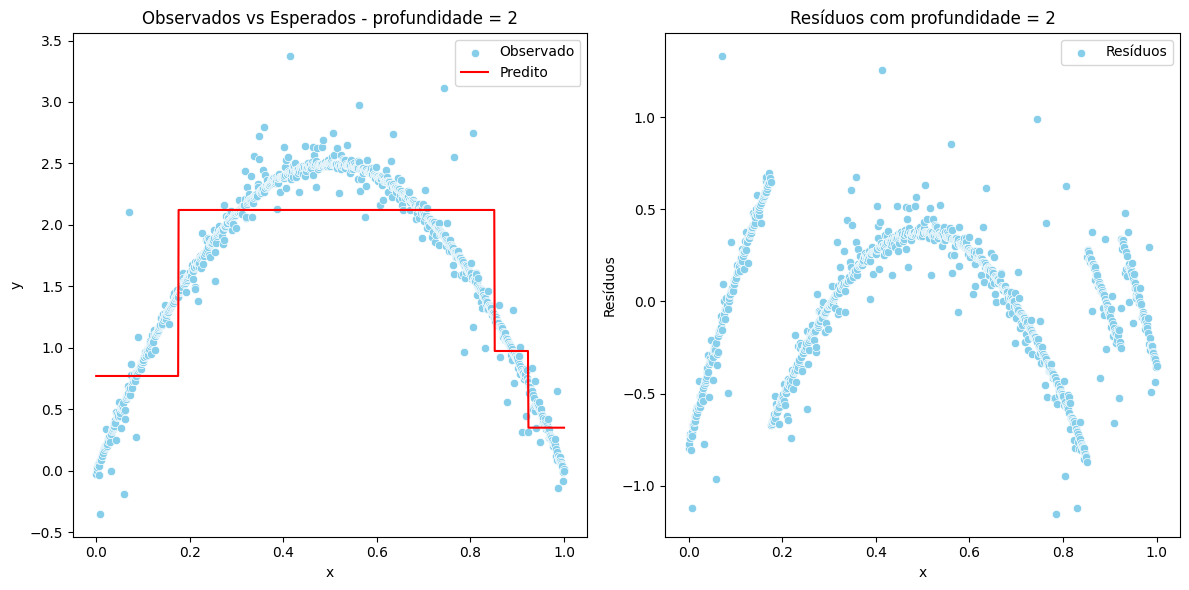

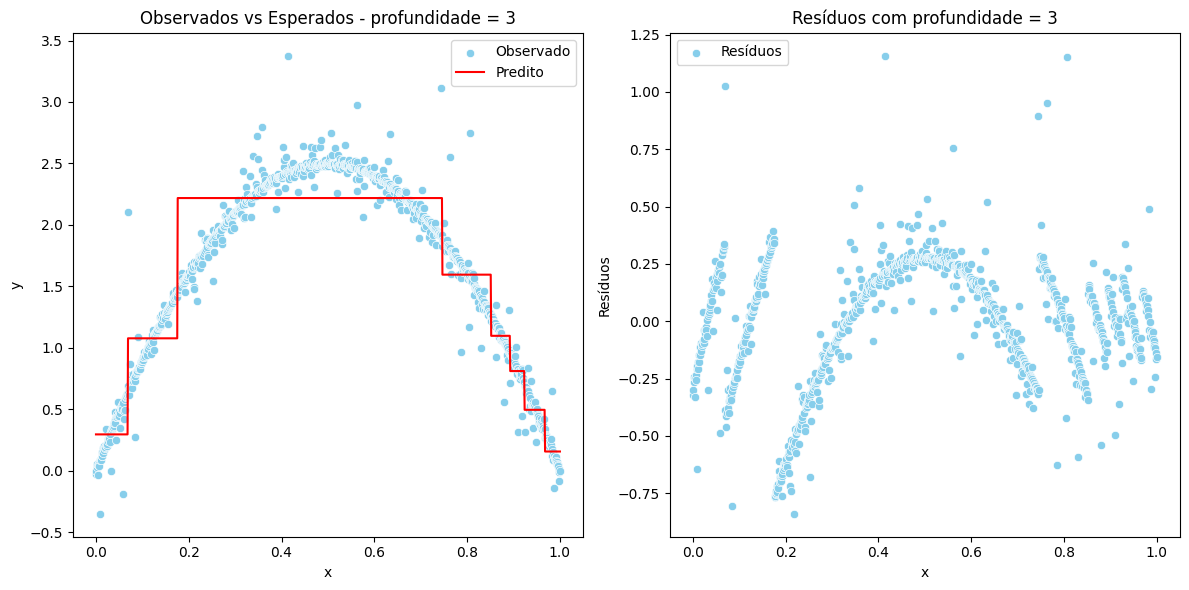

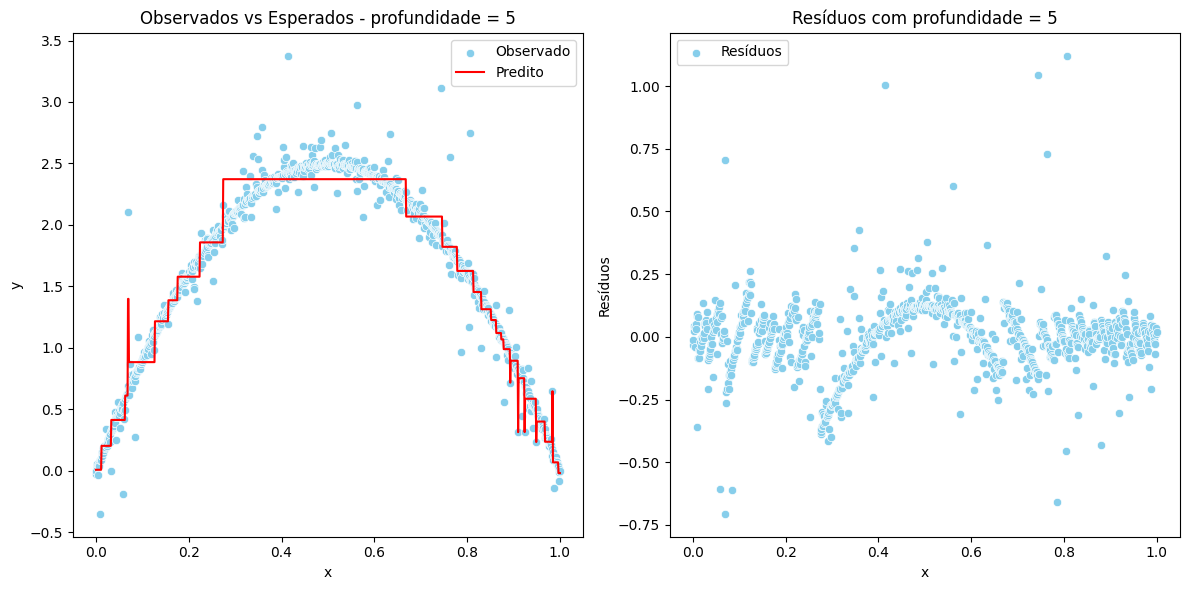

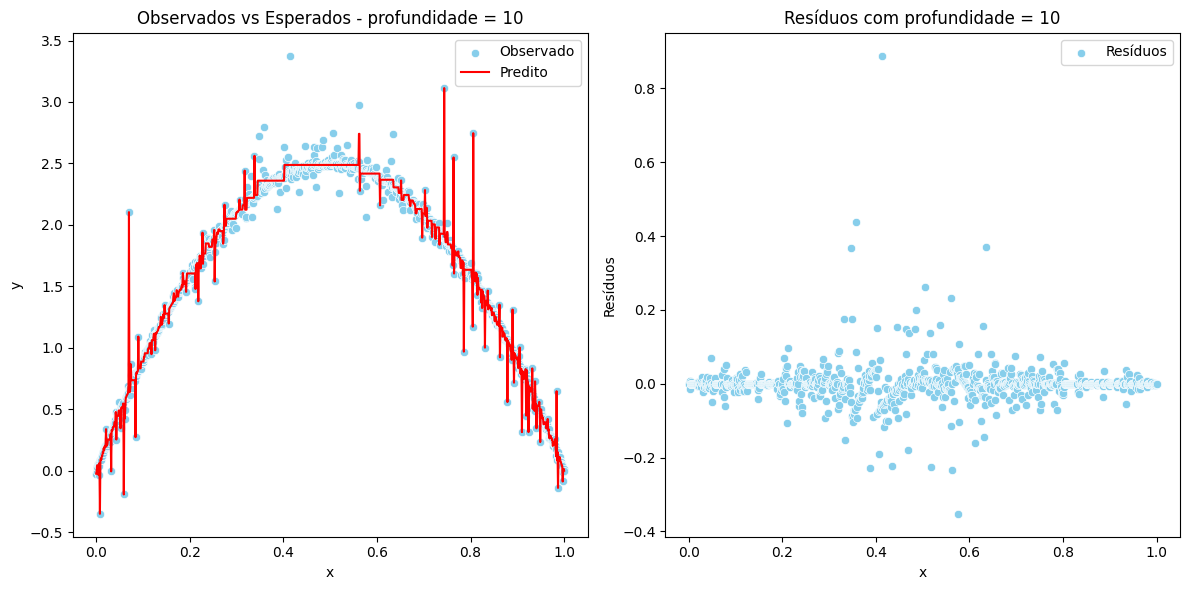

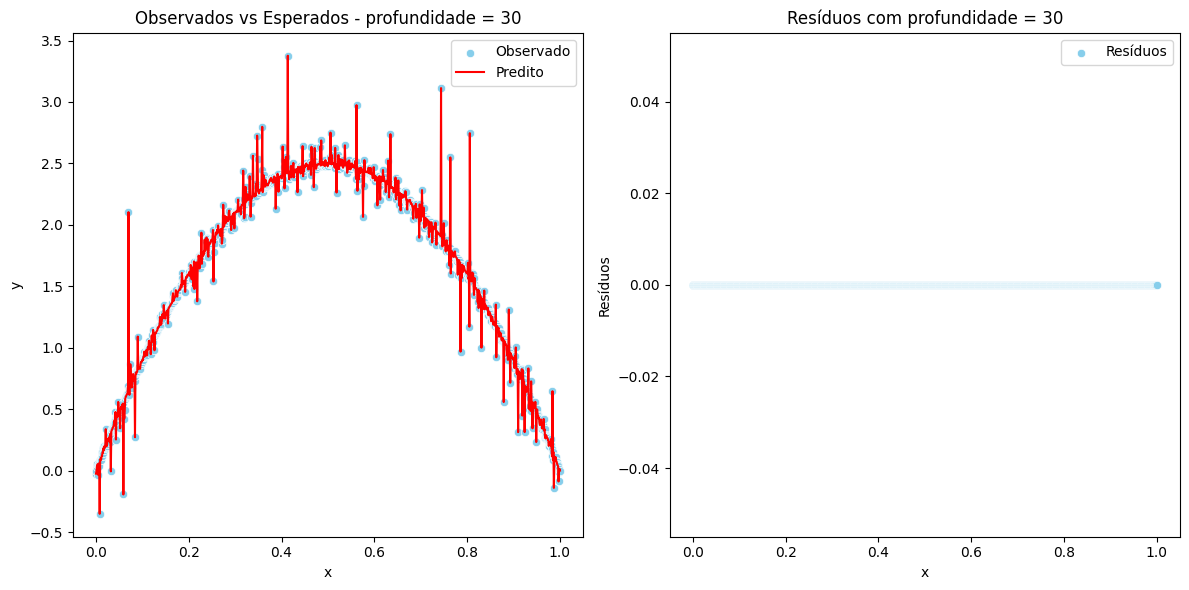

In [13]:
#%% Rodar a função

for i in [1, 2, 3, 5, 10, 30]:
    passo_arvore(i)

### grid-search

In [14]:
#%%###################################################
### Abaixo vamos iniciar o grid search com k-fold
x = df[['x']]
y = df[['y']]

# Treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
#%% Deixando a árvore ser feliz
tree = DecisionTreeRegressor(max_depth=30, ccp_alpha=0)
tree.fit(df[['x']], df['y'])

DecisionTreeRegressor(ccp_alpha=0, max_depth=30)

636

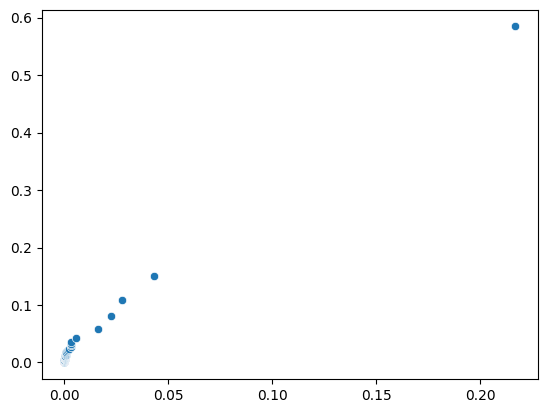

In [17]:
grid = tree.cost_complexity_pruning_path(X_train, y_train)
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
sns.scatterplot(x = ccp_alphas, y = impurities)
len(ccp_alphas)

In [18]:
param_grid  = {'ccp_alpha': ccp_alphas[::10]}

grid_search = GridSearchCV(estimator=tree, 
                          param_grid=param_grid,
                          cv=5,  # 5-fold cross-validation
                          scoring='neg_mean_squared_error')  # Metrica de avaliação

# Treinando o modelo com o grid search
grid_search.fit(X_train, y_train)

#%% Obtendo os melhores parâmetros
best_params = grid_search.best_params_
print(best_params)

{'ccp_alpha': np.float64(0.00013076164261114406)}


In [19]:
#%% Criando o modelo com os melhores parâmetros
best_tree = DecisionTreeRegressor(**best_params, max_depth=30)
best_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=np.float64(0.00013076164261114406),
                      max_depth=30)

In [20]:
#%% Avaliando a árvore na base de teste

# Fazendo previsões na base de teste
y_pred = best_tree.predict(X_test)

# Calculando o R-quadrado
r2 = r2_score(y_test, y_pred)
print("R-quadrado na base de testes:", r2)

R-quadrado na base de testes: 0.9597408670200841


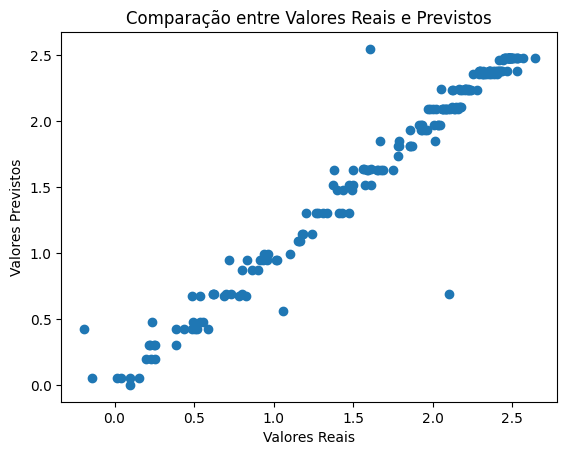

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação entre Valores Reais e Previstos')
plt.show()